In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092        

In [7]:
# Item_Identifier -> Categorica Nominal 
# Item_Weight-> Numerical Continous (Ratio)
# Item_Fat_Content -> Categorical Ordinal 
# Item_Visibility ->  Numerical Continous (Ratio)
# Item_Type -> Categorical Nominal 
# Item_MRP -> Continous (Ratio)
# Outlet_Identifier -> Categorical Nominal 
# Outlet_Establishment_Year -> Categorical Ordinal 
# Outlet_Size -> Categorical Ordinal
# Outlet_Location_Type -> Categorical Ordinal
# Outlet_Type -> Categorical Nominal 
# Item_Outlet_Sales -> Numerical Continous (Ratio)

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight']=df[['Item_Type','Item_Weight']].groupby("Item_Type").transform(lambda x: x.fillna(x.mean()))

In [10]:
df['Item_Weight'].isnull().sum()

0

In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df['Outlet_Size'].isnull().sum()

2410

In [13]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
mode_pivot_table= df.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type',aggfunc=lambda x : x.mode())

In [15]:
mode_pivot_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
missing = df['Outlet_Size'].isnull()

In [17]:
df.loc[missing,'Outlet_Size'] = df.loc[missing,'Outlet_Type'].apply(lambda val : mode_pivot_table[val].loc['Outlet_Size'])

In [18]:
df['Outlet_Size'].isna().sum()

0

In [19]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [20]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857890,4.232804,4.555,9.310000,12.867061,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


C:\Users\Solimna Sore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


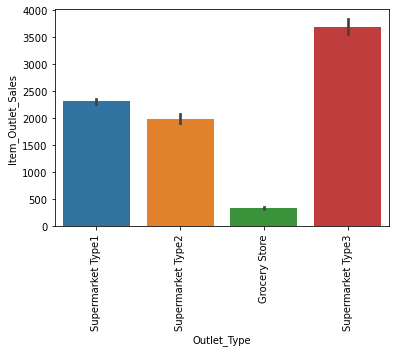

In [30]:
sns.barplot(df['Outlet_Type'],df['Item_Outlet_Sales'])
plt.xticks(rotation = 90);

# 1 - In supermarket Type 3 -> Item Outlet sales is too High and too samll in Grocery store

C:\Users\Solimna Sore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

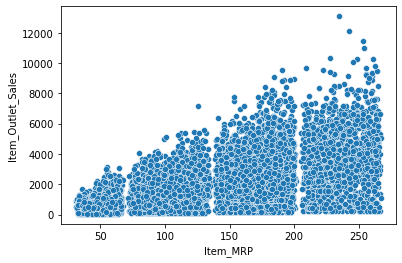

In [62]:
sns.scatterplot(df['Item_MRP'],df['Item_Outlet_Sales'])

In [57]:
np.corrcoef(df['Item_Outlet_Sales'],df['Item_MRP'])

array([[1.        , 0.56757445],
       [0.56757445, 1.        ]])

## 2 Relationship is Postively Correlated 0.57

C:\Users\Solimna Sore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

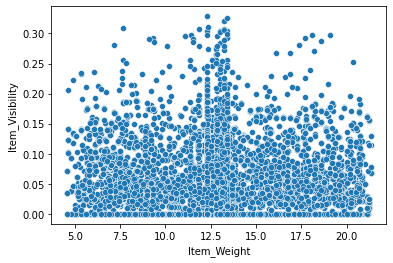

In [33]:
sns.scatterplot(df['Item_Weight'],df['Item_Visibility'])

## 3  No Correlation between Item_weight and Item_Visibilty

In [46]:
np.corrcoef(df['Item_Weight'],df['Item_Visibility'])
## No Correlation

array([[ 1.       , -0.0116201],
       [-0.0116201,  1.       ]])

C:\Users\Solimna Sore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

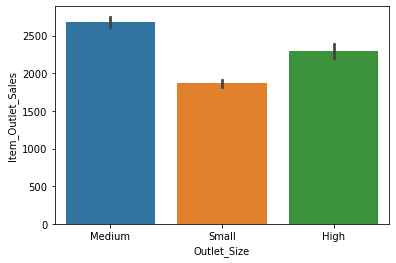

In [35]:
sns.barplot(df['Outlet_Size'],df['Item_Outlet_Sales'])

## 4 Items with medium size have a large sales

C:\Users\Solimna Sore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

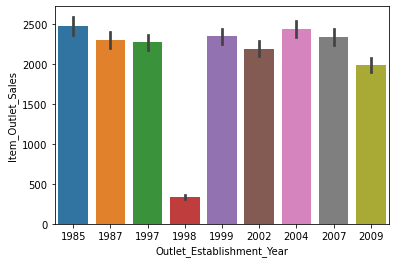

In [36]:
sns.barplot(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])

C:\Users\Solimna Sore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

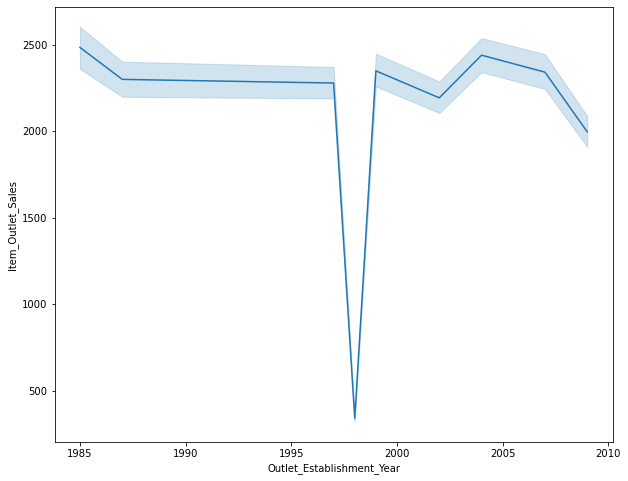

In [65]:
plt.figure(figsize =(10,8))
sns.lineplot(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])

## 5 sales are stable from 1985 and 1997 but Huge drop happened at 1998 as shown here , then sales become stable after that . but there is a drop again from 2007 to 2010

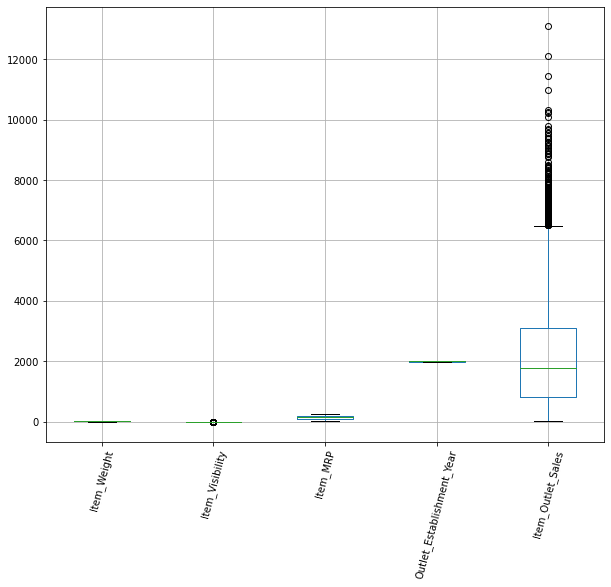

In [70]:

plt.figure(figsize=(10,8))
df.boxplot()
plt.xticks(rotation = 75);

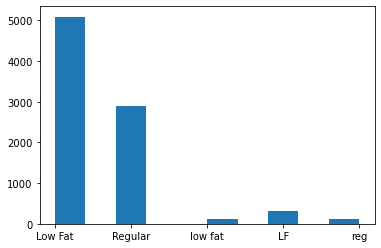

In [48]:
plt.hist(x=df['Item_Fat_Content']);

## Low Fat is highly distributed

In [51]:
correlation = df.corr()

<AxesSubplot:>

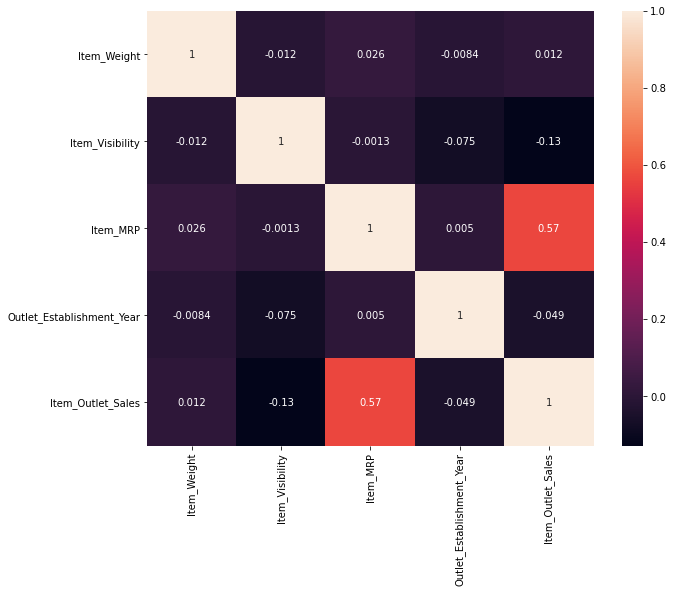

In [72]:
plt.figure(figsize =(10,8))
sns.heatmap(correlation,annot=True)

## There is a negative correlation between Item_outlet_sales and Item_visibility

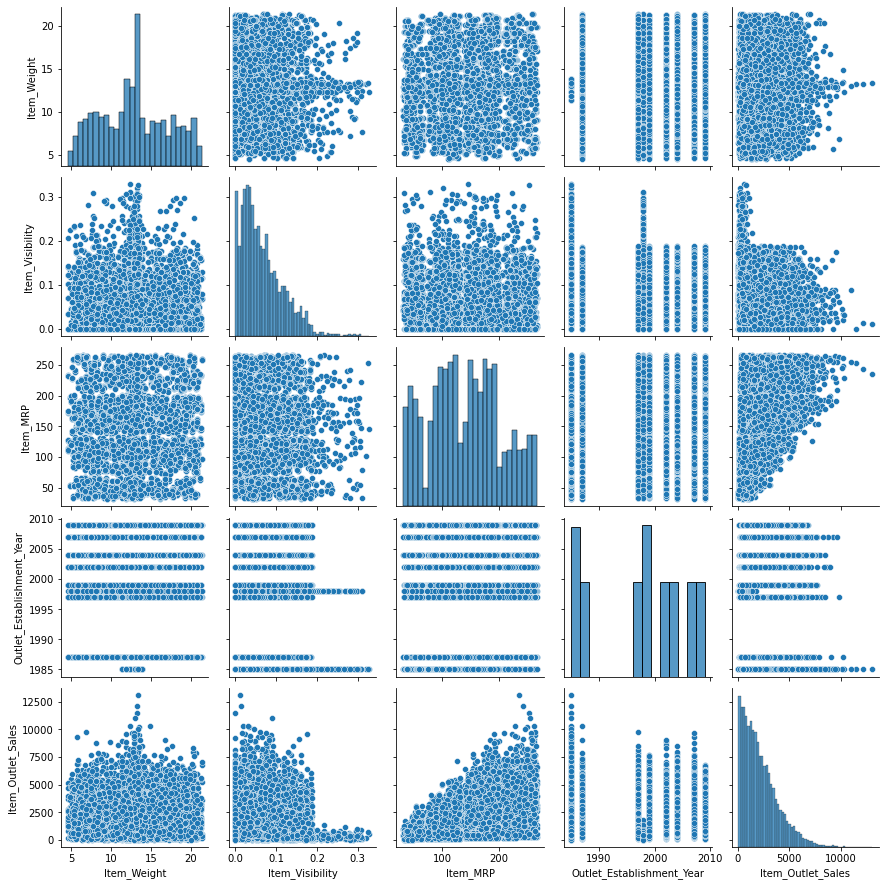

In [56]:
sns.pairplot(df)

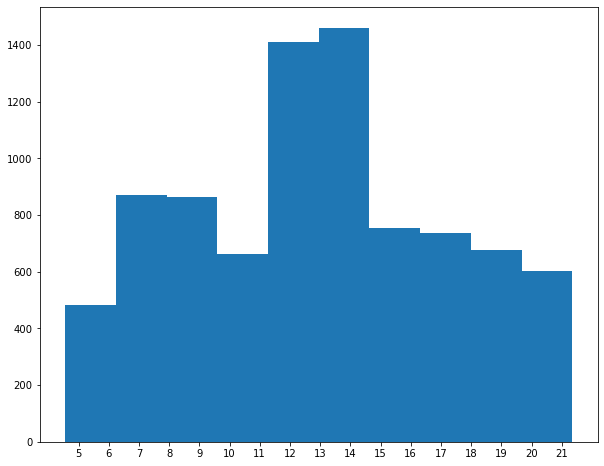

In [85]:
plt.figure(figsize =(10,8))
plt.hist(df['Item_Weight']);
plt.xticks(np.arange(5,22,1));

## Item_Weight is normally Distributed and Highly Distributed around  11.5 to 14.5

## 1- Mohammed Nabil

## 2- Mina Fayek

## 3- Muhammad Emad 

## 4- Moayed Emad

## 5- Omar Naguib

## 6- Mohamed Hesham